# Online Retail Sales Analysis: A Data-Driven Approach to Optimizing Sales and Customer Insights

For this project, I utilized the Online Retail Sales Dataset from Kaggle, which contains transaction-level data including product details, invoice numbers, customer information, and sales quantities. The dataset offers an excellent opportunity to delve into key business questions regarding sales performance, customer behavior, and product trends.

The project aims to demonstrate my ability to handle the complete data analysis workflow, from data cleaning and transformation using SQL to data visualization with Tableau, providing valuable insights into online retail operations. This project showcases essential data analysis skills such as:

Data Cleaning: Converting data into proper types, handling missing values, and normalizing product categories.

SQL Analysis: Performing queries to aggregate data, uncover patterns, and segment customers.

Data Visualization: Building dynamic and insightful Tableau dashboards to make data-driven insights easily understandable.


## Project Goals
The main goals of this project are:

* To identify top-performing products based on sales volume and revenue.
* To analyze regional sales trends, revealing the most profitable areas for the business.
* To uncover seasonal or time-based trends, identifying peak sales periods.
* To segment customers based on purchase behavior and discover potential areas for targeted marketing.

## Potential Insights
Through this analysis, the project can generate actionable insights that are valuable for retail businesses, such as:

* Pinpointing which products contribute the most to overall revenue.
* Understanding customer preferences across different regions and adjusting marketing strategies accordingly.
* Finding seasonal spikes in sales to better manage inventory and promotions.


# Import Necessary Libraries

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/visualizations/Viz_RecencyofPurchase.png
/kaggle/input/visualizations/Viz_CustomerYearlyComparison.png
/kaggle/input/visualizations/Viz_QuarterlySalesYearComparison.png
/kaggle/input/visualizations/Viz_ParetoAnalysisCustomers.png
/kaggle/input/visualizations/Viz_SalesVolumeVsUnitPrice.png
/kaggle/input/visualizations/Viz_topPerformersSalesVolume.png
/kaggle/input/visualizations/Viz_AverageSpend.png
/kaggle/input/visualizations/Viz_FrequencyOfPurchase.png
/kaggle/input/visualizations/Viz_QuarterlySales.png
/kaggle/input/visualizations/Viz_topPerformers.png
/kaggle/input/visualizations/Viz_SalesByCountry.png
/kaggle/input/visualizations/Viz_ParetoAnalysisItems.png
/kaggle/input/online-retails-sale-dataset/Online Retail.csv


Let's load the dataset into a Pandas DataFrame using the pd.read_csv() function

In [3]:
df = pd.read_csv('/kaggle/input/online-retails-sale-dataset/Online Retail.csv')

# Check the first few rows of the dataset
df.head()

,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country
0,536365,01-12-2010,08:26:00 AM,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom
1,536365,01-12-2010,08:26:00 AM,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom
2,536365,01-12-2010,08:26:00 AM,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom
3,536365,01-12-2010,08:26:00 AM,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom
4,536365,01-12-2010,08:26:00 AM,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom


# Verify the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   InvoiceTime  541909 non-null  object 
 3   StockCode    541909 non-null  object 
 4   Description  540455 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Totalsale    541909 non-null  float64
 8   CustomerID   406829 non-null  float64
 9   Country      541909 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 41.3+ MB


# Data Cleaning

In [5]:
# Convert data types
# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
# Merge 'InvoiceDate' and 'InvoiceTime' to create 'InvoiceDatetime'
df['InvoiceDateTime'] = pd.to_datetime(df['InvoiceDate'].astype(str) + ' ' + df['InvoiceTime'], errors='coerce')
# Drop the separate columns 
df.drop(columns=['InvoiceDate', 'InvoiceTime'], inplace=True)

# Convert CustomerID to string
df['CustomerID'] = df['CustomerID'].astype('str')

# Check data types again
print(df.dtypes)

 

InvoiceNo                  object
StockCode                  object
Description                object
Quantity                    int64
UnitPrice                 float64
Totalsale                 float64
CustomerID                 object
Country                    object
InvoiceDateTime    datetime64[ns]
dtype: object


I want to create a column called Quarter for when I do Quarterly Analysis

In [6]:
# Create a new column for the quarter
df['Quarter'] = df['InvoiceDateTime'].dt.quarter

# Check the first few rows to see the result
print(df[['InvoiceDateTime', 'Quarter']].head())

      InvoiceDateTime  Quarter
0 2010-01-12 08:26:00      1.0
1 2010-01-12 08:26:00      1.0
2 2010-01-12 08:26:00      1.0
3 2010-01-12 08:26:00      1.0
4 2010-01-12 08:26:00      1.0



In this analysis, several columns in the dataset were converted to appropriate data types to facilitate better data manipulation and analysis. Here are the specific changes made and the reasons behind them:

### InvoiceDate:

Conversion: Changed from object to datetime64[ns].

Reason: Converting the InvoiceDate to a datetime format allows for easier time-based analysis, such as filtering sales by date, aggregating data over time periods, and conducting time series analysis.

### InvoiceDateTime:

Merge: Merge the InvoiceDate and InvoiceTime columns into one.

Reason: Having all time-related information in one column ensures consistency when filtering or analyzing specific periods.

### CustomerID:

Conversion: Changed from float64 to str.

Reason: The CustomerID can include non-numeric entries and may also have leading zeros, which can be lost if stored as a numeric type. Converting it to a string ensures that all customer identifiers are preserved correctly.

### Other Columns:

Reason for No Change: The remaining columns (InvoiceNo, StockCode, Description, Quantity, UnitPrice, Totalsale, and Country) were retained in their current types as they are already optimally set for their intended analyses. int64 and float64 are appropriate for numerical computations, and object suffices for string data.

In [7]:
# Get summary statistics for the numeric columns
summary_stats = df.describe()
print(summary_stats)

            Quantity      UnitPrice      Totalsale  \
count  541909.000000  541909.000000  541909.000000   
mean        9.552250       4.611114      17.987795   
min    -80995.000000  -11062.060000 -168469.600000   
25%         1.000000       1.250000       3.400000   
50%         3.000000       2.080000       9.750000   
75%        10.000000       4.130000      17.400000   
max     80995.000000   38970.000000  168469.600000   
std       218.081158      96.759853     378.810824   

                     InvoiceDateTime        Quarter  
count                         232959  232959.000000  
mean   2011-05-14 03:14:20.515884800       2.523890  
min              2010-01-12 08:26:00       1.000000  
25%              2011-03-04 11:36:00       2.000000  
50%              2011-06-09 10:46:00       3.000000  
75%              2011-09-06 10:46:00       3.000000  
max              2011-12-10 17:19:00       4.000000  
std                              NaN       1.057696  


There are a few concerning things in our summary statistics. There are negative values for the minimum values for Quantity, UnitPrice, and Totalsale. This could indicate returns or can simply be a mistake made when entering the values and thus should be positive. To determine which is the case and how I should handle it, I will be investigating it further.

In [8]:
# Check for negative quantities and select relevant columns
negative_quantity = df[df['Quantity'] < 0][['InvoiceNo', 'CustomerID','InvoiceDateTime', 'Quantity', 'UnitPrice', 'Totalsale']]
print("Negative Quantities:\n", negative_quantity)

# Check for negative totalsales and select relevant columns
negative_totalsale = df[df['Totalsale'] < 0][['InvoiceNo', 'InvoiceDateTime', 'Quantity', 'UnitPrice', 'Totalsale']]
# print("Negative Totalsale:\n", negative_totalsale)

Negative Quantities:
        InvoiceNo CustomerID     InvoiceDateTime  Quantity  UnitPrice  \
141      C536379    14527.0 2010-01-12 09:41:00        -1      27.50   
154      C536383    15311.0 2010-01-12 09:49:00        -1       4.65   
235      C536391    17548.0 2010-01-12 10:24:00       -12       1.65   
236      C536391    17548.0 2010-01-12 10:24:00       -24       0.29   
237      C536391    17548.0 2010-01-12 10:24:00       -24       0.29   
...          ...        ...                 ...       ...        ...   
540449   C581490    14397.0 2011-09-12 09:57:00       -11       0.83   
541541   C581499    15498.0 2011-09-12 10:28:00        -1     224.69   
541715   C581568    15311.0 2011-09-12 11:57:00        -5      10.95   
541716   C581569    17315.0 2011-09-12 11:58:00        -1       1.25   
541717   C581569    17315.0 2011-09-12 11:58:00        -5       1.25   

        Totalsale  
141        -27.50  
154         -4.65  
235        -19.80  
236         -6.96  
237         -

A sizable amount of records contain a negative value for those columns so I can rule out it being a mistake. Instead, it is likely to be returns. 

In [9]:
returns = df[df['Quantity'] < 0]

# Identify sales (positive quantity)
sales = df[df['Quantity'] > 0]

# Merge returns with sales on CustomerID and StockCode
merged = pd.merge(returns, sales, on=['CustomerID', 'StockCode'], how='left', suffixes=('_return', '_sale'))

# Check for cases where there is a negative quantity but no matching positive quantity
no_sales_for_returns = merged[merged['Quantity_sale'].isnull()]

# Display the returns without corresponding sales
print("Returns without corresponding sales:\n", no_sales_for_returns[['CustomerID', 'StockCode', 'Quantity_return']])

# Check if all negative quantities have corresponding positive quantities
if no_sales_for_returns.empty:
    print("All negative quantities have corresponding positive quantities.")
else:
    print(f"There are {no_sales_for_returns.shape[0]} returns without corresponding sales.")

Returns without corresponding sales:
       CustomerID StockCode  Quantity_return
0        14527.0         D               -1
5        17548.0     22556              -12
6        17548.0     21984              -24
7        17548.0     21983              -24
8        17548.0     21980              -24
...          ...       ...              ...
79056    17490.0         M               -1
79078        nan    84801A             -102
79419    16933.0     22627               -1
79431    14442.0     21533               -1
79584    15498.0         M               -1

[1261 rows x 3 columns]
There are 1261 returns without corresponding sales.


In [10]:
# Filter for records where CustomerID is NaN or empty
returns_with_missing_customerID = no_sales_for_returns[no_sales_for_returns['CustomerID'].isnull()]
nan_customerID = no_sales_for_returns[no_sales_for_returns['CustomerID'].isna()] 
# Display the results
print("Returns without corresponding sales and missing CustomerID:\n", returns_with_missing_customerID)
print(f"Number of records with missing CustomerID: {returns_with_missing_customerID.shape[0]}")

# Display the rows with missing CustomerID
print(nan_customerID)
print(f"Number of rows with missing CustomerID: {nan_customerID.shape[0]}")

Returns without corresponding sales and missing CustomerID:
 Empty DataFrame
Columns: [InvoiceNo_return, StockCode, Description_return, Quantity_return, UnitPrice_return, Totalsale_return, CustomerID, Country_return, InvoiceDateTime_return, Quarter_return, InvoiceNo_sale, Description_sale, Quantity_sale, UnitPrice_sale, Totalsale_sale, Country_sale, InvoiceDateTime_sale, Quarter_sale]
Index: []
Number of records with missing CustomerID: 0
Empty DataFrame
Columns: [InvoiceNo_return, StockCode, Description_return, Quantity_return, UnitPrice_return, Totalsale_return, CustomerID, Country_return, InvoiceDateTime_return, Quarter_return, InvoiceNo_sale, Description_sale, Quantity_sale, UnitPrice_sale, Totalsale_sale, Country_sale, InvoiceDateTime_sale, Quarter_sale]
Index: []
Number of rows with missing CustomerID: 0


In [11]:
# Check if 'nan' is present as a string in CustomerID
string_nan_customerID = no_sales_for_returns[no_sales_for_returns['CustomerID'] == 'nan']

# Display the rows where 'CustomerID' is 'nan' (as a string)
#print(string_nan_customerID)
print(f"Number of rows with 'nan' as a string: {string_nan_customerID.shape[0]}")

Number of rows with 'nan' as a string: 313


It seems like empty CustomerID values are stored as a string rather than proper missing values (NaN). To handle this, I will convert them.

In [12]:
# Replace 'nan' strings in CustomerID with actual NaN
no_sales_for_returns.loc[no_sales_for_returns['CustomerID'] == 'nan', 'CustomerID'] = np.nan

# Verify if the conversion worked
nan_customerID = no_sales_for_returns[no_sales_for_returns['CustomerID'].isna()]
print(f"Number of rows with missing CustomerID after conversion: {nan_customerID.shape[0]}")

Number of rows with missing CustomerID after conversion: 313


For the remaining records where CustomerID is present, we can assume the following for those that have no matching sales:

* **Manual Return Entries**: The return could have been entered manually without a direct link to the original sale in the system (e.g., using a different InvoiceNo).

* **Partial or Untracked Returns**: In some cases, customers may have returned items separately or bought them under different conditions where the link to the original sale is unclear or missing.

I will be exporting the cleaned data to visualize in Tableau

In [13]:
df.to_csv('cleanedRetailsDataset.csv', index=False)

# Initial Exploratory Data Analysis

Before visualizing the data in Tableau, I will perform an exploratory data analysis. 

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country,InvoiceDateTime,Quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom,2010-01-12 08:26:00,1.0
1,536365,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom,2010-01-12 08:26:00,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom,2010-01-12 08:26:00,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom,2010-01-12 08:26:00,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom,2010-01-12 08:26:00,1.0


## Top Products by Sales Volume

In [15]:
topProductsVolume = df.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending=False)
print(topProductsVolume.head(10))

StockCode  Description                       
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
85099B     JUMBO BAG RED RETROSPOT               47363
84879      ASSORTED COLOUR BIRD ORNAMENT         36381
22197      POPCORN HOLDER                        36334
21212      PACK OF 72 RETROSPOT CAKE CASES       36039
85123A     WHITE HANGING HEART T-LIGHT HOLDER    35025
23084      RABBIT NIGHT LIGHT                    30680
22492      MINI PAINT SET VINTAGE                26437
22616      PACK OF 12 LONDON TISSUES             26315
21977      PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name: Quantity, dtype: int64


## Top Products by Revenue

In [16]:
topProductsRevenue = df.groupby(['StockCode', 'Description'])['Totalsale'].sum().sort_values(ascending=False)
print(topProductsRevenue.head(10))

StockCode  Description                       
DOT        DOTCOM POSTAGE                        206245.48
22423      REGENCY CAKESTAND 3 TIER              164762.19
47566      PARTY BUNTING                          98302.98
85123A     WHITE HANGING HEART T-LIGHT HOLDER     97715.99
85099B     JUMBO BAG RED RETROSPOT                92356.03
23084      RABBIT NIGHT LIGHT                     66756.59
POST       POSTAGE                                66230.64
22086      PAPER CHAIN KIT 50'S CHRISTMAS         63791.94
84879      ASSORTED COLOUR BIRD ORNAMENT          58959.73
79321      CHILLI LIGHTS                          53768.06
Name: Totalsale, dtype: float64


## Analyze Regional Sales

In [17]:
topRegions = df.groupby(['Country'])['Totalsale'].sum().sort_values(ascending = False)
print(topRegions.head(10))

Country
United Kingdom    8187806.36
Netherlands        284661.54
EIRE               263276.82
Germany            221698.21
France             197403.90
Australia          137077.27
Switzerland         56385.35
Spain               54774.58
Belgium             40910.96
Sweden              36595.91
Name: Totalsale, dtype: float64


## Seasonal  Trends

I'll do a quarterly analysis
* Q1: Winter (Jan-Mar)
* Q2: Spring (Apr-Jun)
* Q3: Summer (Jul-Sep)
* Q4: Fall (Oct-Dec)

In [18]:
quartersRanked = df.groupby(['Quarter'])['Totalsale'].sum().sort_values(ascending = False)
print(quartersRanked)

Quarter
3.0    1177377.86
2.0    1091831.55
4.0     966163.93
1.0     912905.23
Name: Totalsale, dtype: float64


In [19]:
def categorize_sales_period(date):
    if (date.month in [1, 2]):  
        return 'Winter Clearance'
    elif (date.month in [3, 4, 5]):  
        return 'Spring Sales'
    elif (date.month in [6, 7]):  
        return 'Summer Promotions'
    elif (date.month == 8):  
        return 'Back-to-School'
    elif (date.month == 9):  
        return 'Back-to-School'
    elif (date.month == 10):  
        return 'Early Holiday Shopping'
    elif (date.month in [11, 12]):  
        return 'Holiday Shopping'
    else:  
        return 'Other'

# Using loc to filter out records with invalid or empty InvoiceDateTime values
df.loc[df['InvoiceDateTime'].notnull(), 'SalesPeriod'] = df.loc[df['InvoiceDateTime'].notnull(), 'InvoiceDateTime'].apply(categorize_sales_period)
sales_by_period = df[df['SalesPeriod'].notnull()].groupby('SalesPeriod')['Totalsale'].sum().reset_index()
sales_by_period = sales_by_period.sort_values(by='Totalsale', ascending=False)

print(sales_by_period)

              SalesPeriod   Totalsale
3            Spring Sales  1019098.83
4       Summer Promotions   830650.70
0          Back-to-School   727597.99
2        Holiday Shopping   621684.87
5        Winter Clearance   604767.12
1  Early Holiday Shopping   344479.06


# Visualizations in Tableau and Analysis

After cleaning and transforming the data, I exported the processed dataset from Kaggle and imported it into Tableau. In Tableau, I created various visualizations, like Pareto charts, bar charts, and line graphs, to explore key metrics such as sales performance, regional distribution, and customer segmentation. This process combined Python's data-cleaning power with Tableau's visualization features for an interactive sales analysis dashboard.

The interactive Tableau dashboard can be viewed at the following links:
https://public.tableau.com/app/profile/ajaane.kanagasabai/viz/OnlineRetailSalesAnalysis_17332491897690/SalesDashboard 
https://public.tableau.com/app/profile/ajaane.kanagasabai/viz/OnlineRetailSalesAnalysis_17332491897690/SalesAnalysis?publish=yes


Below, I analyze each graph and state some key takeaways for the business.

## Top Performing Products

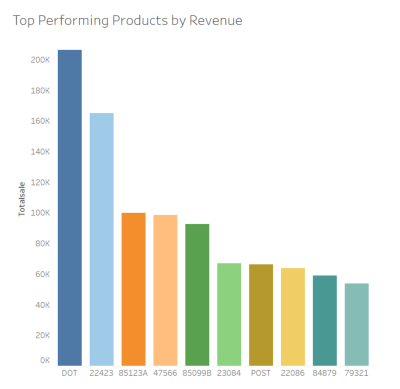

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = "/kaggle/input/visualizations/Viz_topPerformersSalesVolume.png"
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off') 
plt.show()

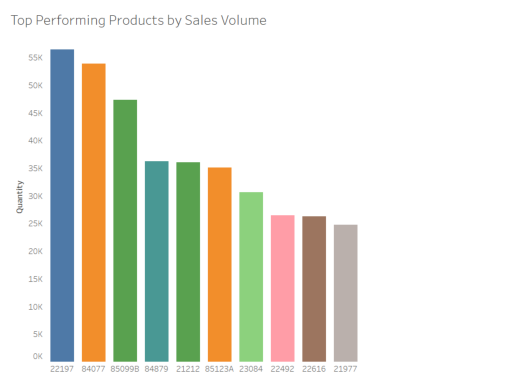

In [21]:
img_path = "/kaggle/input/visualizations/Viz_topPerformers.png"
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off') 
plt.show()

The exploratory analysis revealed an interesting divergence between products driving sales volume and those driving revenue. The top 20 products by sales volume are not the same as the top 20 by revenue. This indicates that products with high sales frequency are generally lower-priced items, while products generating high revenue tend to be higher-priced, premium offerings. This differentiation suggests that the product portfolio is diverse—catering both to bargain-focused customers and premium buyers.

**Strategically Takeaways**:

- High Volume Items can be leveraged to drive customer acquisition and boost overall traffic, even if they have lower margins.
- High Revenue Items are crucial for profitability and may benefit from premium marketing strategies.

I will further investigate this by plotting Sales Volume with Unit Price

## Sales Volume Vs. Unit Price

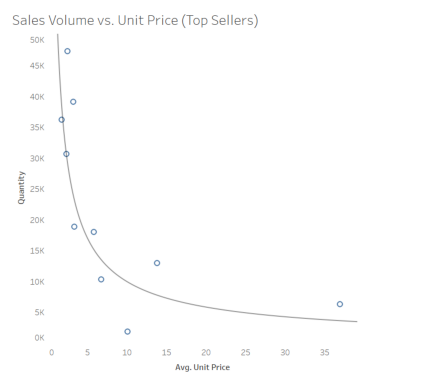

In [22]:
img_path = "/kaggle/input/visualizations/Viz_SalesVolumeVsUnitPrice.png"
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off') 
plt.show()

The scatter plot confirms a strong inverse relationship between unit price and sales volume. Lower-priced products tend to sell in significantly higher quantities, while higher-priced items see much lower sales volume. 

**Strategic Takeaways**:
- Bundle Low-Priced, High-Volume Items: Encourage bulk purchases through discounts or bundles to maximize revenue.
- Optimize Inventory for Seasonal Demand: Ensuring stock availability for high-volume items during peak seasons can further drive sales
- Cross-Sell High-Priced Items: Pairing premium items with frequently bought products can improve profitability.


## Sales Distribution By Country

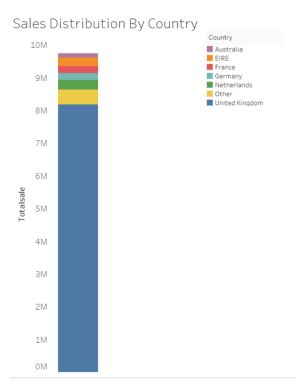

In [23]:
img_path = "/kaggle/input/visualizations/Viz_SalesByCountry.png"
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off') 
plt.show()

Since around 84% of sales come from the UK, the business is heavily reliant on this single market. Any economic downturn, policy changes, or shifts in consumer behavior in the UK could significantly impact overall sales. It might be wise to focus on improving the customer base in other countries. 

The remaining ~20% of sales are distributed across multiple countries, showing that there is some international demand. The business could explore marketing strategies, localized promotions, or partnerships to increase sales in these regions.

Since most sales occur in the UK, shipping and distribution costs might be optimized for this region. Expanding internationally could require better logistical planning, localized warehouses, or partnerships with regional distributors.

## Quarterly Sales

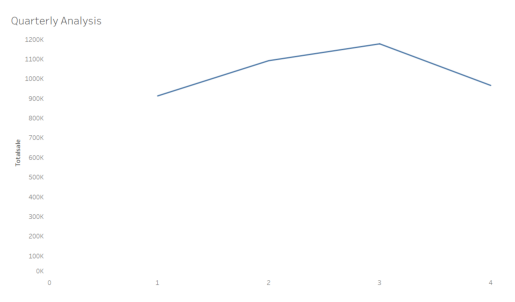

In [24]:
img_path = "/kaggle/input/visualizations/Viz_QuarterlySales.png"
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off') 
plt.show()

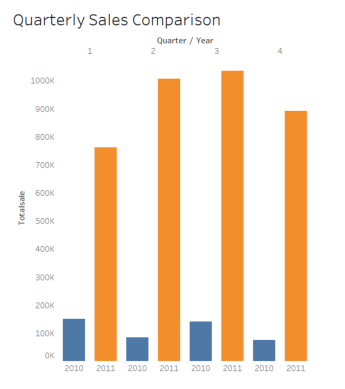

In [25]:
img_path = "/kaggle/input/visualizations/Viz_QuarterlySalesYearComparison.png"
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off') 
plt.show()

Sales in each quarter of 2011 are significantly higher than in 2010, indicating strong year-over-year growth.

The highest sales were recorded in Q3 2011, suggesting a particularly strong season (possibly Back-to-School or another high-demand period). Determining whether specific products or promotions contributed to this spike, could allow business to grow.

Q1 consistently has the lowest sales in both years. This is common in many industries due to post-holiday spending declines. It may be useful to investigate strategies to boost sales during this period.

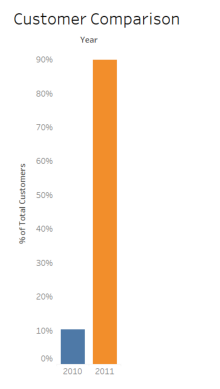

In [26]:
img_path = "/kaggle/input/visualizations/Viz_CustomerYearlyComparison.png"
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off') 
plt.show()

## Pareto Analysis

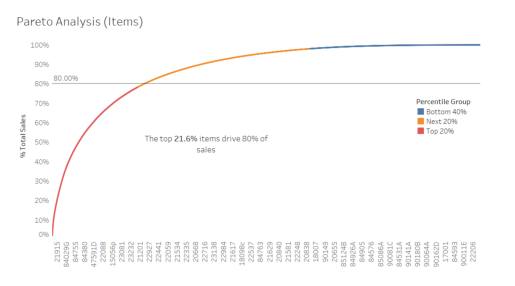

In [27]:
img_path = "/kaggle/input/visualizations/Viz_ParetoAnalysisItems.png"
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off') 
plt.show()

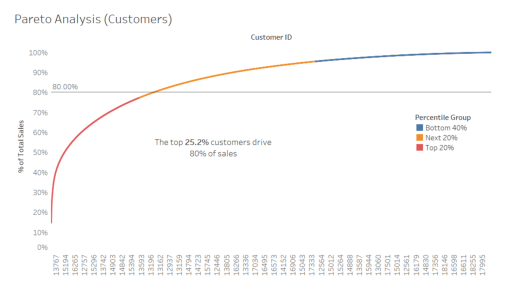

In [28]:
img_path = "/kaggle/input/visualizations/Viz_ParetoAnalysisCustomers.png"
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off') 
plt.show()

A Pareto Analysis is a technique used to identify the most significant factors in a dataset by applying the 80/20 rule—which states that roughly 80% of outcomes come from 20% of causes. In business and sales, this means that a small percentage of products or customers often contribute to the majority of revenue.

**Insights from the Pareto Analysis:**

Items Analysis (Top Chart)
The top 21.6% of items account for 80% of total sales. This suggests that a small subset of products drives most of the revenue. Business strategies could focus on optimizing inventory, promotions, and marketing efforts toward these top-selling items.

Customers Analysis (Bottom Chart)
The top 25.2% of customers generate 80% of total sales. This highlights the importance of customer segmentation—identifying high-value customers and tailoring loyalty programs, personalized promotions, or premium services to retain them.

**Strategic Takeaways:**

- Prioritize stocking and promoting the top-selling items while reviewing slow-moving inventory.
- Focus on retaining and engaging the top 25% of customers with targeted marketing and incentives.
- While the bottom 40% contributes relatively little, there may be niche opportunities for growth through tailored campaigns or bundling strategies.

## Customer Segmentation

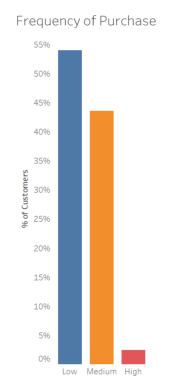

In [29]:
img_path = "/kaggle/input/visualizations/Viz_FrequencyOfPurchase.png"
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off') 
plt.show()

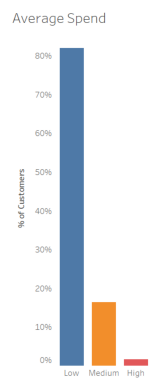

In [30]:
img_path = "/kaggle/input/visualizations/Viz_AverageSpend.png"
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off') 
plt.show()

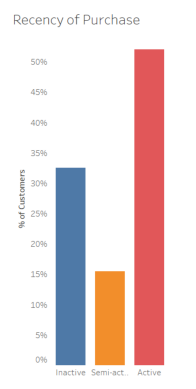

In [31]:
img_path = "/kaggle/input/visualizations/Viz_RecencyofPurchase.png"
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off') 
plt.show()

The above three graphs segment customers based on Recency of Purchase, Average Spend, and Frequency of Purchase, which are key dimensions for customer behavior analysis. 

**Recency of Purchase**

A significant portion of customers are active, meaning they have made recent purchases.
There is also a noticeable share of inactive customers, who may need re-engagement strategies like promotions or personalized offers.

**Average Spend**

The majority of customers fall into the low-spending category, indicating that while many people buy, their individual purchase values are not high. Very few customers fall into the high-spending category, highlighting potential opportunities to nurture higher-value customers or introduce premium offerings.

**Frequency of Purchase**

Most customers have a low-to-medium purchase frequency, suggesting that retention strategies could focus on encouraging repeat purchases through loyalty programs or targeted marketing. The high-frequency customer segment is quite small, making them a valuable group that should be nurtured with VIP programs or special deals.


**Strategic Takeaways**:
- Strategies should focus on increasing purchase frequency and spend per customer.
- Re-engagement campaigns could be useful to convert inactive customers.
- A tiered loyalty program could incentivize spending and frequency.